In [0]:
import numpy as np
import random

STOP_THRESHOLD = 1e-4
CLUSTER_THRESHOLD = 1e-1



def gaussianKernel(distance, bandwidth):
  return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)) ** 2)


def distance(pointA,pointB):
  return np.linalg.norm(np.array(pointA) - np.array(pointB))


class MeanShift(object):
    def __init__(self, kernel=gaussianKernel):
        self.kernel = kernel

    def fit(self, points, kernel_bandwidth):

        shift_points = np.array(points)
        shifting = [True] * points.shape[0]

        while True:
            max_dist = 0
            for i in range(0, len(shift_points)):
                if not shifting[i]:
                    continue
                p_shift_init = shift_points[i].copy()
                shift_points[i] = self.shift_point(shift_points[i], points, kernel_bandwidth)
                dist = distance(shift_points[i], p_shift_init)
                max_dist = max(max_dist, dist)
                shifting[i] = dist > STOP_THRESHOLD

            if(max_dist < STOP_THRESHOLD):
                break
        cluster_ids = self.cluster_points(shift_points.tolist())
        return shift_points, cluster_ids

    def shift_point(self, point, points, kernel_bandwidth):
        shift_x = 0.0
        shift_y = 0.0
        scale = 0.0
        for p in points:
            dist = distance(point, p)
            weight = self.kernel(dist, kernel_bandwidth)
            shift_x += p[0] * weight
            shift_y += p[1] * weight
            scale += weight
        shift_x = shift_x / scale
        shift_y = shift_y / scale
        return [shift_x, shift_y]

    def cluster_points(self, points):
        cluster_ids = []
        cluster_idx = 0
        cluster_centers = []

        for i, point in enumerate(points):
            if(len(cluster_ids) == 0):
                cluster_ids.append(cluster_idx)
                cluster_centers.append(point)
                cluster_idx += 1
            else:
                for center in cluster_centers:
                    dist = distance(point, center)
                    if(dist < CLUSTER_THRESHOLD):
                        cluster_ids.append(cluster_centers.index(center))
                if(len(cluster_ids) < i + 1):
                    cluster_ids.append(cluster_idx)
                    cluster_centers.append(point)
                    cluster_idx += 1
        return cluster_ids

**Testing**

input: [[-1.077 -0.556]
 [ 0.523  0.477]
 [-0.537  0.093]
 ...
 [ 0.519  1.231]
 [ 0.946  1.26 ]
 [-0.626  0.868]]
assined clusters: [0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1,

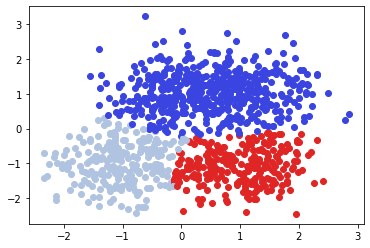

In [4]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

def colors(num):
  res=[]
  for i in range(num):
    res.append((random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)))
  return res

centers = [[-1, -1], [1, 1], [0, 1], [1, -1]]
X,_ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)

mean_shifter=MeanShift()
_, mean_shift_result = mean_shifter.fit(X, kernel_bandwidth=0.43)

np.set_printoptions(precision=3)
print('input: {}'.format(X))
print('assined clusters: {}'.format(mean_shift_result))
color = colors(np.unique(mean_shift_result).size)

for i in range(len(mean_shift_result)):
    plt.scatter(X[i, 0], X[i, 1], color = color[mean_shift_result[i]])
plt.show()